In [1]:
import numpy as np
import matplotlib.pyplot as plt
from computerrefractored import Computer
import re
%load_ext autoreload
%autoreload 2


In [6]:
noun, verb = 0,0
f=open('input.txt').read()
memory = tuple(int(i) for i in f.split(',')) # let's make it immutable as a tuple
memsize = 100000
memory = tuple(list(memory)+[0]*memsize)
c = Computer(list(memory),noun,verb,[1])
c.code[0]=2
def getview(c):
    lines = []
    line = []
    while c.running:
        char = c.run()
        if char == 10: 
            if len(line)==0:
              break
            lines.append(line)
            line = []
        else:
            if char =='ending execution': pass 
            else: line.append(int(char))  
    view = np.array(lines)
    return view

In [3]:
def sendfunction(function):
    res =[]
    for i in range(len(function)):
        f = ord(function[i])
        res.append(f)
        if i != len(function)-1:res.append(ord(','))
    res.append(10)
    return res

a = 'AABCBCBCBA'
b = 'R55L66R6'
co = 'R6R55R66R6'
d = 'R55L66L66'
e = 'n'
ins = [a,b,co,d,e]
tosend = [sendfunction(i) for i in ins]
tosend = [i for l in tosend for i in l]
c.receiveinput(tosend)
while True:
    c.run()
    if len(c.input)==0: 
        print('read memory')
        break

read memory


In [4]:
while c.running:
    res = c.run()
    if res != 'ending execution' and res >100: print(res)

952010
opcode 99 computer finished


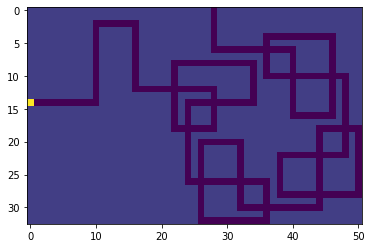

In [7]:
view = getview(c)
plt.imshow(view)

In [8]:
scaf = set([tuple(i) for i in np.argwhere(view!=46)])

def getneigh(i):
  res = []
  if (i[0],i[1]+1) in scaf: res.append((i[0],i[1]+1))
  if (i[0],i[1]-1) in scaf: res.append((i[0],i[1]-1))
  if (i[0]+1,i[1]) in scaf: res.append((i[0]+1,i[1]))
  if (i[0]-1,i[1]) in scaf: res.append((i[0]-1,i[1]))
  return res
neigh = {tuple(i):getneigh(tuple(i)) for i in np.argwhere(view!=46)}

In [9]:
class Pos():
    def __init__(self,input):
        self.x,self.y = input[0],input[1]
        self.n = getneigh((self.x,self.y))
        if len(self.n)==2 and abs(self.n[0][0]-self.n[1][0])==1:
            self.isturn = True
        else:
            self.isturn = False
    
    def getturn(self,old,new):
        if old == (0,1) and new == (1,0): return 'R'
        if old == (0,1) and new == (-1,0): return 'L'
        if old == (-1,0) and new == (0,1): return 'R'
        if old == (-1,0) and new == (0,-1): return 'L'
        if old == (1,0) and new == (0,-1): return 'R'
        if old == (1,0) and new == (0,1): return 'L'
        if old == (0,-1) and new == (-1,0): return 'R'
        if old == (0,-1) and new == (1,0): return 'L'
        print('error turning',old,new)

    def getnext(self,dx,dy):
        new = None
        turn = None
        n = self.n
        if len(n)==1:
            # print('done')
            new = n[0]
            turn = self.getturn((dx,dy),(new[0]-self.x,new[1]-self.y))
            dx = new[0]-self.x
            dy = new[1]-self.y
            
        elif len(n)==2:
            # print('ongoing')
            if self.isturn:
                # print('turn')
                for neigh in n:
                    if (self.x-dx,self.y-dy)== neigh: n.remove((self.x-dx,self.y-dy))
                # print(len(n))
                newx = n[0][0]
                newy = n[0][1]
                new = (newx,newy)
                turn = self.getturn((dx,dy),(newx-self.x,newy-self.y))
                dx = newx-self.x
                dy = newy-self.y
            else:
                # print('no turn')
                new = (self.x+dx,self.y+dy)
                turn = None
        elif len(n)==4:
            # print('intersection')
            new = (self.x+dx,self.y+dy)
            
        return dx,dy,new,turn
  

In [10]:
res = []
view.shape
for i in np.argwhere(view==35):
    if i[0]!=32 and i[0]!=0 and i[1]!=50 and i[1] != 0:
        if view[i[0],i[1]+1]==35 and view[i[0],i[1]-1]==35 and view[i[0]+1,i[1]]==35 and view[i[0]-1,i[1]]==35:
            res.append(i[0]*i[1])
sum(res)         

7816

In [11]:
start = tuple(np.argwhere(view == 94)[0])
dx,dy  = -1,0
print(start)

counter = 0
ins = []
while counter != 2:
    if len(Pos(start).n)==1: counter +=1
    if counter==2: break
    dx,dy,start,turn = Pos(start).getnext(dx,dy)
    if turn: ins.append(turn)
    ins.append(1)
    # print(dx,dy,start,turn)
ins = ''.join([str(i) for i in ins])   
print(ins)

(14, 0)
R1111111111L111111111111R111111R1111111111L111111111111R111111R111111R1111111111R111111111111R111111R1111111111L111111111111L111111111111R111111R1111111111R111111111111R111111R1111111111L111111111111L111111111111R111111R1111111111R111111111111R111111R1111111111L111111111111L111111111111R111111R1111111111R111111111111R111111R1111111111L111111111111R111111


In [12]:
a = re.findall(r'((\w)\2*)',ins)
ins = [i[0] for i in a]
ins = [len(i) if i[0]=='1' else i for i in ins]

In [13]:
''.join([str(i) for i in ins])

'R10L12R6R10L12R6R6R10R12R6R10L12L12R6R10R12R6R10L12L12R6R10R12R6R10L12L12R6R10R12R6R10L12R6'